In [9]:
from BasinGeo import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [2]:
complete = pd.read_csv('EOF.csv')
data = complete.assign(dy=complete.get('nlat')-complete.get('lat'));
data = data.assign(dx=data.get('nlon')-data.get('lon'));
for i in range(1, 9):
  data[f'prev_ts{i}'] = data[f'ts{i}'].shift(1)
data['prev_dy'] = data['dy'].shift(1)
data['prev_dx'] = data['dx'].shift(1)

mask = (data['folderidx'] == data['folderidx'].shift(1)) & \
       (data['float'] == data['float'].shift(1)) & \
       (data['profileidx'] == data['profileidx'].shift(1) + 1)
data.loc[~mask, [f'prev_ts{i}' for i in range(1, 9)]] = np.nan
data = data.dropna()
data

,folderidx,float,profileidx,year,month,day,lat,lon,nlat,nlon,...,prev_ts1,prev_ts2,prev_ts3,prev_ts4,prev_ts5,prev_ts6,prev_ts7,prev_ts8,prev_dy,prev_dx
1,0.0,1901932.0,1.0,2021.0,5.0,30.0,-36.8170,30.9419,-38.4510,32.7565,...,-8.429544,-2.753714,-2.788564,-1.469766,-0.750992,-0.662656,-0.047516,-0.002373,2.9730,0.8784
2,0.0,1901932.0,2.0,2021.0,6.0,9.0,-38.4510,32.7565,-40.0302,35.9652,...,-16.224981,-2.328750,-2.156176,-4.411510,0.422385,-0.068476,-0.906169,-0.072356,-1.6340,1.8146
3,0.0,1901932.0,3.0,2021.0,6.0,19.0,-40.0302,35.9652,-39.2969,38.6928,...,-4.645711,-3.005418,-1.453715,-0.668177,-0.787948,-0.472165,0.048625,0.050058,-1.5792,3.2087
4,0.0,1901932.0,4.0,2021.0,6.0,29.0,-39.2969,38.6928,-38.0227,40.9031,...,-7.028408,-3.373396,-2.194893,-1.104086,-0.824606,-0.262984,0.291729,-0.280132,0.7333,2.7276
5,0.0,1901932.0,5.0,2021.0,7.0,8.0,-38.0227,40.9031,-40.4052,43.1839,...,-3.312371,-3.200434,-1.266698,-0.764814,-0.671834,-0.252487,0.113580,0.043449,1.2742,2.2103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0.0,1901270.0,20.0,2012.0,5.0,22.0,-34.6030,-37.7250,-34.3920,-37.3270,...,-3.817698,-4.599620,-5.528163,0.528060,-1.712870,1.115541,0.310922,-0.593749,0.4810,0.0410
9995,0.0,1901270.0,21.0,2012.0,6.0,1.0,-34.3920,-37.3270,-34.3820,-36.9020,...,-2.815671,-4.453010,-4.868307,0.697028,-1.711296,0.876660,0.124823,-0.264297,0.2110,0.3980
9996,0.0,1901270.0,22.0,2012.0,6.0,11.0,-34.3820,-36.9020,-34.5850,-36.5780,...,-3.701556,-4.312377,-5.325528,0.760080,-1.756200,0.753141,0.250715,-0.503962,0.0100,0.4250
9997,0.0,1901270.0,23.0,2012.0,6.0,21.0,-34.5850,-36.5780,-34.8270,-36.3610,...,-5.364796,-4.041777,-6.015128,0.835049,-1.793005,0.575829,0.513536,-0.646926,-0.2030,0.3240


0.4535857113168412 0.2765017663551975


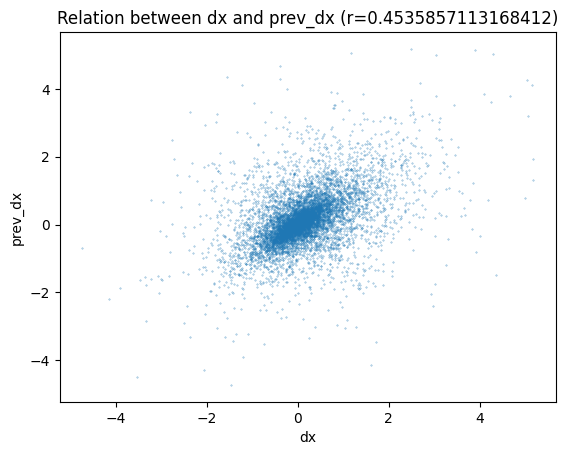

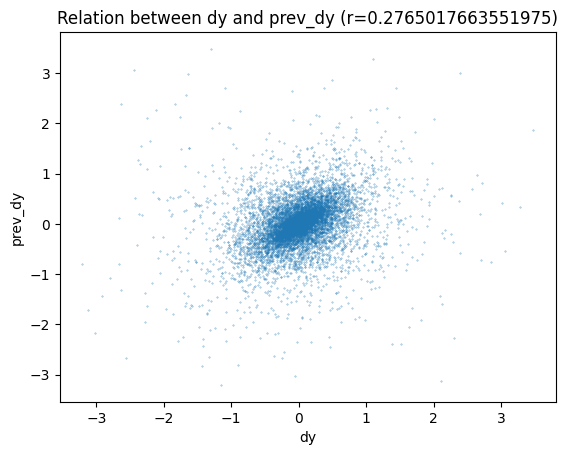

In [39]:
# find correlation between prev_dx and dx
prev_dx = data.get('prev_dx')
dx = data.get('dx')
prev_dy = data.get('prev_dy')
dy = data.get('dy')
print(dx.corr(prev_dx), dy.corr(prev_dy))

plt.scatter(dx, prev_dx, alpha=.7, s=0.1);
plt.title(f'Relation between dx and prev_dx (r={dx.corr(prev_dx)})')
plt.xlabel('dx')
plt.ylabel('prev_dx');
plt.show()

plt.scatter(dy, prev_dy, alpha=.7, s=0.1);
plt.title(f'Relation between dy and prev_dy (r={dy.corr(prev_dy)})')
plt.xlabel('dy')
plt.ylabel('prev_dy');
plt.show()

In [4]:
for basin in basins.keys():
    print(basin)

Indian
NAtlantic
TropicalAtlantic
SouthAtlantic
NPacific
TropicalPacific
SouthPacific
GOM


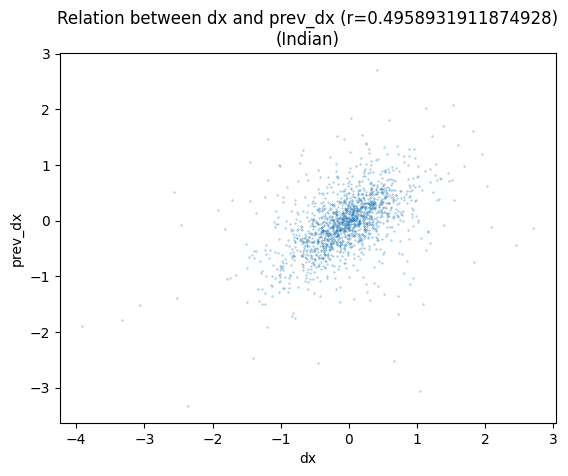

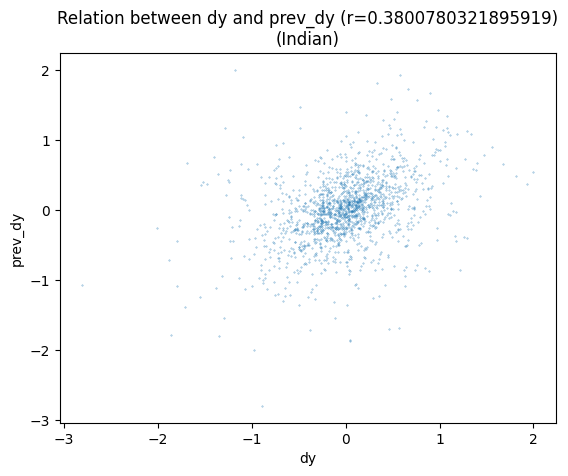

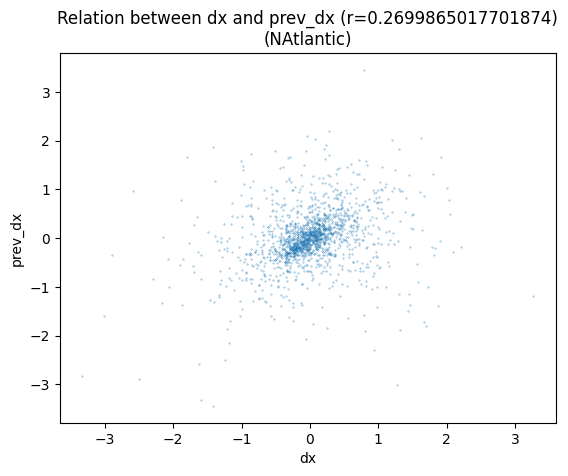

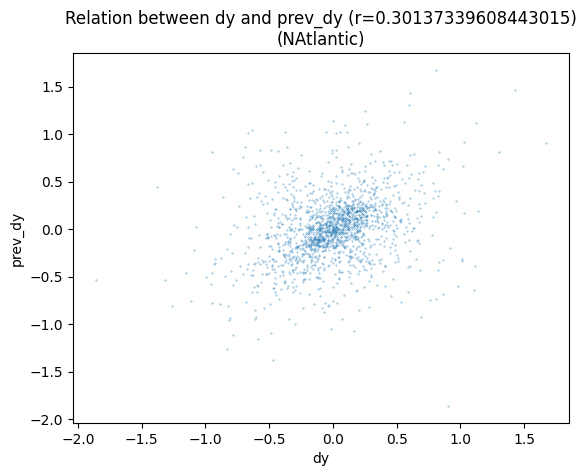

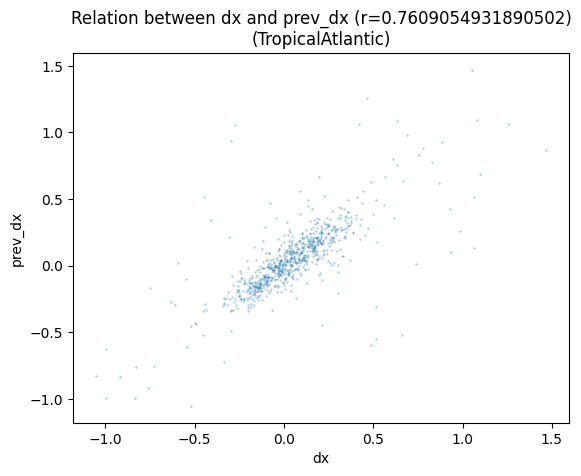

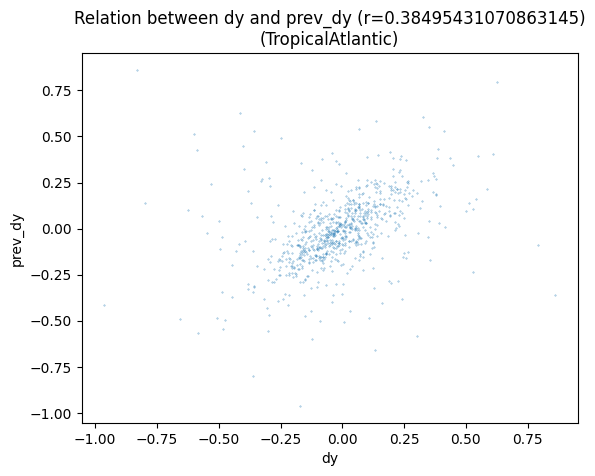

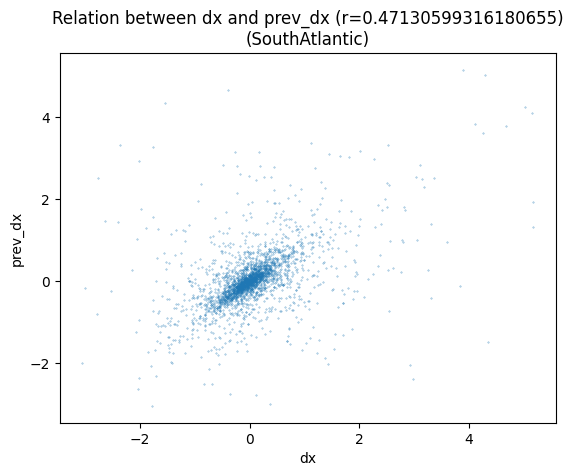

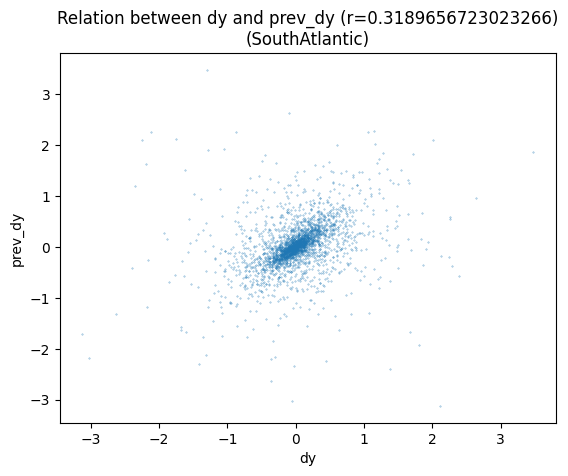

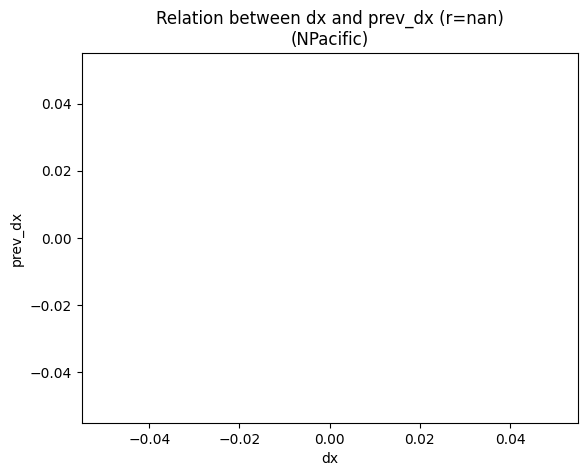

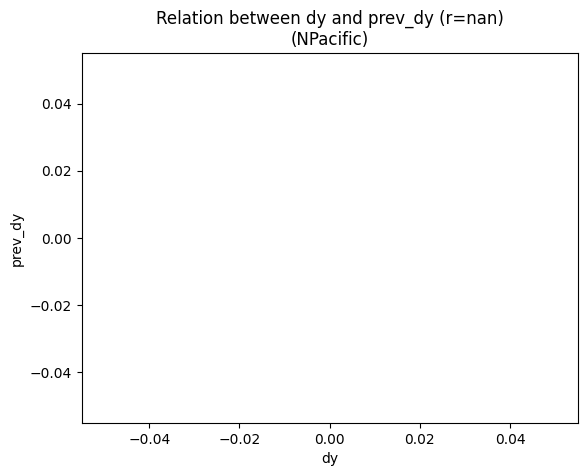

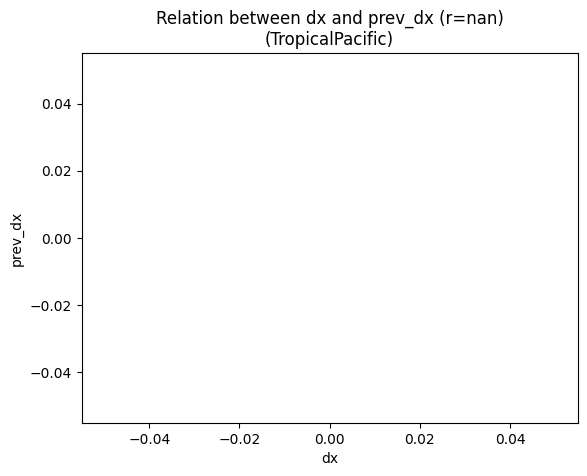

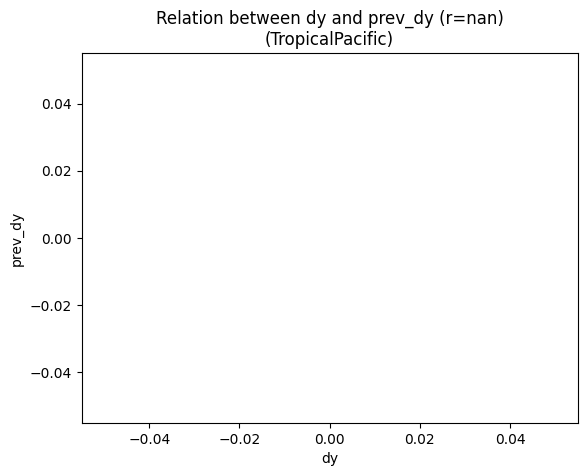

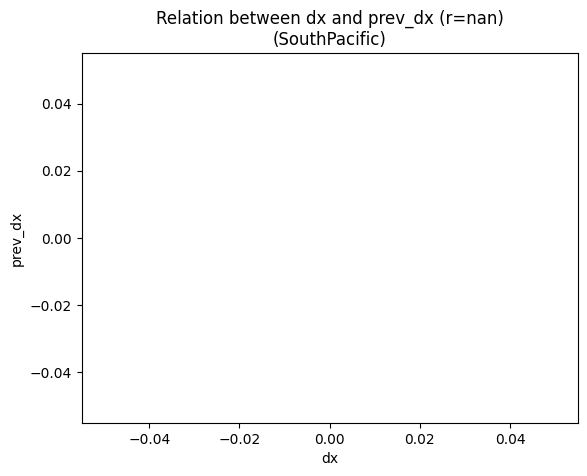

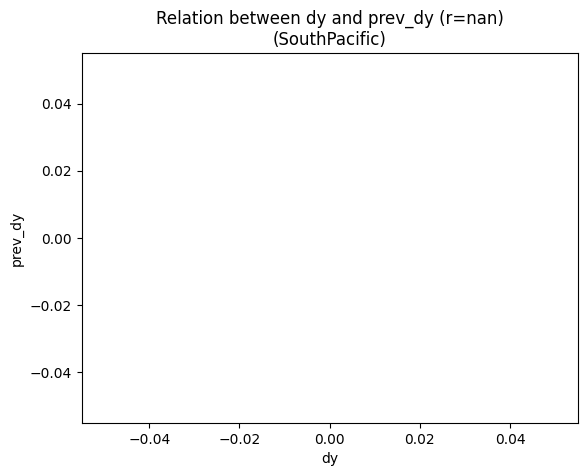

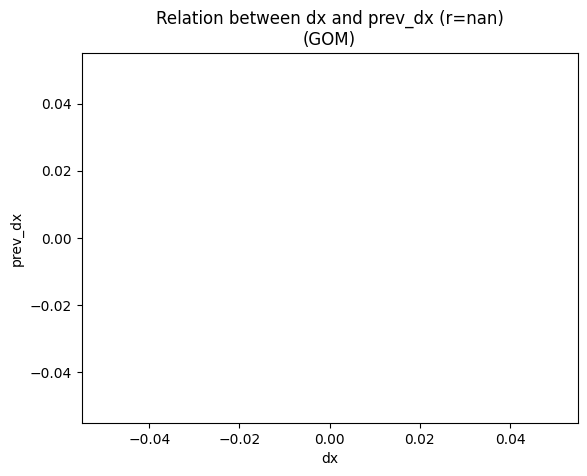

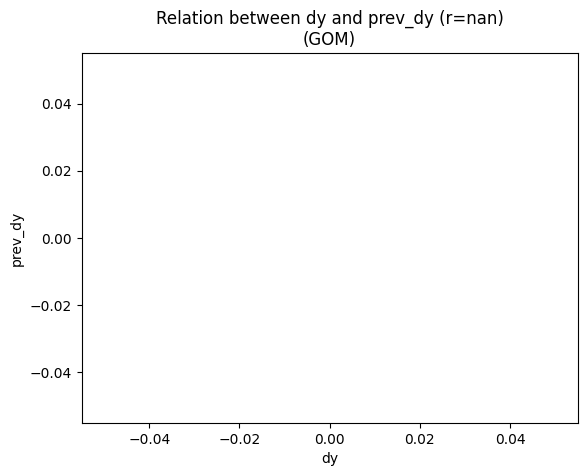

In [38]:
for basin in basins:
    chosen = shapely.Polygon(basins[basin])
    vPoint = np.vectorize(Point)
    points_list = vPoint(data['lon'], data['lat'])
    data['in_chosen_basin'] = chosen.contains(points_list)
    subset = data[data.get('in_chosen_basin') == True]

    # find correlation between prev_dx and dx
    prev_dx = subset.get('prev_dx')
    dx = subset.get('dx')
    prev_dy = subset.get('prev_dy')
    dy = subset.get('dy')

    plt.scatter(dx, prev_dx, alpha=.7, s=0.1);
    plt.title(f'Relation between dx and prev_dx (r={dx.corr(prev_dx)})\n({basin})')
    plt.xlabel('dx')
    plt.ylabel('prev_dx');
    plt.show()

    plt.scatter(dy, prev_dy, alpha=.7, s=0.1);
    plt.title(f'Relation between dy and prev_dy (r={dy.corr(prev_dy)})\n({basin})')
    plt.xlabel('dy')
    plt.ylabel('prev_dy');
    plt.show()